In this notebook, we will attempt **Polynomial Curve Fitting**. So, what is Polynomial Curve Fitting ? Basically, we will try to fit a polynomial function into some custom dataset and check the results. We will start by importing some of the required modules.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

**DATASET CREATION**

Firstly, we have to create a dataset on which we want to fit the polynomial. We have chosen the **sine** function as the basis of the dataset. Now, we want to create a dataset, which will be well approximated by the sine function. For that purpose, it makes sense to add some random noise to the values given by the sine function. This will make our dataset somewhat different from the sine function but the sine function will be able to approximate the dataset very well. 

Hence, we can consider the sine function to be the benchmark we want to attain with our polynomial.  

In [ ]:
def func(x):
  return np.sin(x)

In [ ]:
def create_dataset(n):
  x = np.linspace(0,10,num=n)
  y = func(x)+np.random.randn(n)*0.1
  return x,y

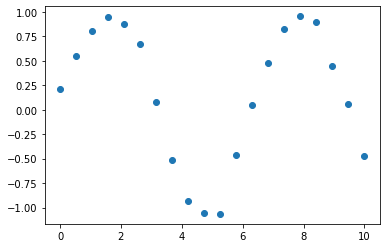

In [ ]:
x,y = create_dataset(20)
plt.scatter(x,y)

The above plot represent a scatter plot of the points of our dataset. The plot below is the same as above, only the sine function is plotted in green. So, we can see that the sine function generalizes the dataset quite well.

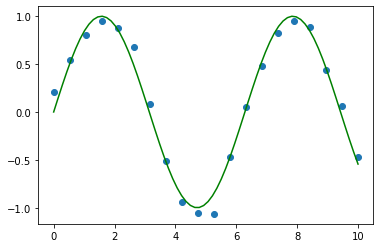

In [ ]:
a = np.linspace(0,10,num=70)
plt.plot(a,np.sin(a),color='green')
plt.scatter(x,y)

---

So, let us first define the problem. We want to fit the sine curve with a polynomial of degree n. The polynomial will be of the form - 

$$ y = w_0 x^0+w_1x^1+w_2x^2+\dots+w_nx^n $$

This can also be written as :

$$ y = \sum_{i=0}^{n} {w_ix^i}$$

If we dive deeper into the Mathematics, we find that this can be represented as:

$$ w =  \begin {bmatrix}
w_1 \\ 
w_2 \\
w_3 \\
\vdots \\

w_n
 \end {bmatrix} 
 
 x = \begin {bmatrix}
x \\ 
x^2 \\
x^3 \\
\vdots \\

x^n
 \end {bmatrix}
 
 $$

So, y can be written as

$$ y = w^Tx   $$

$$ y =   \begin {bmatrix}
w_1  \   
w_2   \
w_3   \
\dots  \ 

w_n \
 \end {bmatrix} 
 
 \begin {bmatrix}
x \\ 
x^2 \\
x^3 \\
\vdots \\

x^n
 \end {bmatrix}  + w_0$$

We will apply the final equation, taking the values of w and powers of x to find an output.



---



Now that we have created the dataset, it makes sense for us to create a few helper functions. First we create a **predict function** . This function will take in the input value and the weights and give a prediction. 

In [ ]:
def predict(x,w):
  x_v = [x**i for i in range(len(w))]
  return np.dot(x_v,w) 

As we are trying to fit a curve based on a dataset, it becomes very important which **loss function** we choose. Here, I have trained the models for different loss functions and found that two functions optimize the problem very well:
1. The Mean Squared Error function

$$ Error(x,y,w) = Mean\ (Predicted\ value - Actual\ Value )^2 $$
2. The Total Absolute Error function

$$ Error(x,y,w) = Sum\ |Predicted\ value - Actual\ Value | $$

In [ ]:
def loss(y,x,w):
  yhat = [predict(x,w) for x in x]
  l = sum((y-yhat)**2) / len(w)
  return l,yhat

In [ ]:
def lossmod(y,x,w):
  yhat = [predict(x,w) for x in x]
  l = np.sum(np.abs((y-yhat)))
  return l,yhat

---
Now that we have created the dataset and defined the loss functions, we can now move into optimization. We will use the **Gradient Descent Optimizer** here.

<img src = "/content/grad_desc.jpeg" >

As we are doing everything from scratch, I have also written the derivative calculator as **grad2** . It computes gradient based on:
$$ \frac {d f(a)}{dh} =   \lim_{h\to0} \left[\frac {f(a+h)-f(a)}{h} \right]  $$

It takes the loss function, weight vector, x, y values, the value h which is near 0 and finally val. Val is basically the index of the weight matrix, on the basis of which we want to calculate the derivative.

In [ ]:
def grad2(f,w,x,y,h,val):
  b,yhat = f(y,x,w)
  w[val]+=h
  a,yhat = f(y,x,w)
  g = (a-b)/h
  return g,yhat

---

**GRADIENT DESCENT BEGINS**

In [ ]:
import time

Initializing the weights matrix with 4 numbers, as we want to fit a 3degree polynomial.

In [ ]:
t=time.time()
w_vector = np.random.randn(4)
print(w_vector)
time.time()-t

[ 0.50215617  0.1765335  -1.10172016 -0.08465456]


0.0005688667297363281

In [ ]:
x,y

(array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
         5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
         7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ]),
 array([ 0.21023767,  0.54357394,  0.80731814,  0.94725855,  0.87181705,
         0.67506378,  0.08018886, -0.51003242, -0.93578724, -1.05457796,
        -1.06468548, -0.4671655 ,  0.04771788,  0.47681042,  0.82710866,
         0.95449004,  0.89255291,  0.4418323 ,  0.06296955, -0.4736451 ]))

Hard coding gradient descent for 50,000 epochs 

In [ ]:
t=time.time()
print(loss(y,x,w_vector))
yhat = []
lossf = []
#finding gradient wrt w[0]
for i in range(100000):
  #g4,yhat = grad2(loss,w_vector,x,y,0.0000000001,4)
  g3,yhat = grad2(loss,w_vector,x,y,0.0000000001,3)
  g2,yhat = grad2(loss,w_vector,x,y,0.0000000001,2)
  g1,yhat = grad2(loss,w_vector,x,y,0.0000000001,1)
  g0,yhat = grad2(loss,w_vector,x,y,0.0000000001,0)
  #for j in range(6):
  #  w_vector[j]-=0.1
  
  #w_vector[4]-=1e-8*g4
  #print("w[4] {}".format(w_vector[4]))
  w_vector[3]-=1e-6*g3
  #print("w[3] {}".format(w_vector[3]))
  w_vector[2]-=1e-6*g2
  #print("w[2] {}".format(w_vector[2]))
  w_vector[1]-=1e-6*g1
  #print("w[1] {}".format(w_vector[1]))
  w_vector[0]-=1e-6*g0
  #print("w[0] {}".format(w_vector[0]))
  #print(yhat)
  l,_ = loss(y,x,w_vector)
  lossf.append(l)
  if(i%500 == 0):
    print("Loss at epoch {} is {}".format(i,l))

time.time()-t

(35083.574447887535, [0.5021561732878445, 0.2775407876360784, -0.6314985613353229, -2.299014557876747, -4.79905988623858, -8.20568723067121, -12.592949275425026, -18.034898704750407, -24.60558820289775, -32.37907045411743, -41.42939814265985, -51.83062395277538, -63.656800568714445, -76.98198067472737, -91.88021695506458, -108.42556209397647, -126.6920687757134, -146.7537896845258, -168.68477750466397, -192.5590849203784])
Loss at epoch 0 is 14612.692644471439
Loss at epoch 500 is 154.94052365274825
Loss at epoch 1000 is 83.0377467068354
Loss at epoch 1500 is 45.18291252992711
Loss at epoch 2000 is 25.25234288625733
Loss at epoch 2500 is 14.757862067287476
Loss at epoch 3000 is 9.230941774976017
Loss at epoch 3500 is 6.319162289958774
Loss at epoch 4000 is 4.7841124212801756
Loss at epoch 4500 is 3.9738407707944
Loss at epoch 5000 is 3.5451330668040244
Loss at epoch 5500 is 3.3173070140422345
Loss at epoch 6000 is 3.1952438958447917
Loss at epoch 6500 is 3.1288692419796433
Loss at epoc

110.80915808677673

In [ ]:
w_vector

array([ 0.45834011,  0.24069605, -0.10785949,  0.00862487])

Plot of the loss with epochs

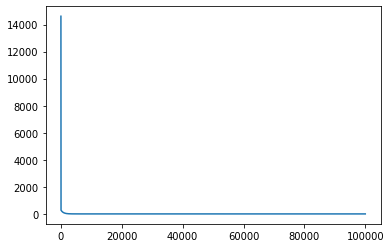

In [ ]:
epochs = range(100000)
plt.plot(epochs,lossf)

Plotting the function we generated and comparing it with the benchmark sin(x) in green

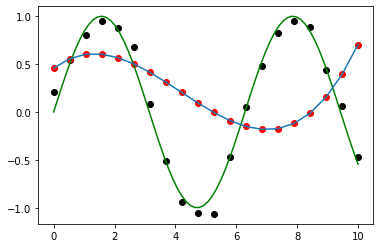

In [ ]:
a = np.linspace(0,10,num=70)
plt.plot(a,np.sin(a),color='green')
plt.scatter(x,y,color='black')
plt.scatter(x,yhat,color='red')
plt.plot(x,yhat)

With a higher degree polynomial and more data, we can obtain a better curve. But the obtained blue curve has behaviour like sin(x), only that the crests and troughs are much smaller 

**Creating a general function for model creation**

In [ ]:
def model_creation(lossfn,x,y,w,learning_rate,epoch):
  t=time.time()
  loss2=[]
  print(lossfn(y,x,w))
  yhat=[]
  grads=[0,0,0,0]
  for i in range(epoch):
    #print(grads)
    j=0
    while(j<4):
      grads[j],yhat = grad2(lossfn,w,x,y,0.0000000001,j)
      j+=1
    j=0
    #print(grads)
    while(j<4):
      w[j]-= learning_rate*grads[j]
      j+=1
    l,_= lossfn(y,x,w)
    loss2.append(l)
    if i%1000 == 0:
      print("Loss at epoch {} is {}".format(i,l))
  print("Loss at epoch {} is {}".format(epoch,l))
  return loss2,yhat


In [ ]:
t=time.time()
w_vector = np.random.randn(4)
print(w_vector)
time.time()-t

[ 0.85978344  0.85571474  0.72477313 -0.06035355]


0.0005464553833007812

In [ ]:
l,yhat = model_creation(loss,x,y,w_vector,1e-6,100000)

(1299.8467894916862, [0.8597834412083103, 1.5021286250178654, 2.4932151128677007, 3.7802478474502523, 5.310431771457951, 7.030971827583235, 8.889072958518538, 10.831940106956296, 12.806778215588936, 14.760792227108903, 16.641187084208624, 18.39516772958054, 19.96993910591708, 21.312706155910675, 22.37067382225378, 23.091047047638803, 23.421030774758187, 23.307829946304373, 22.69864950496981, 21.540694393446895])
Loss at epoch 0 is 725.9315728947381
Loss at epoch 1000 is 92.85051094343538
Loss at epoch 2000 is 28.57995532393329
Loss at epoch 3000 is 10.754689793525877
Loss at epoch 4000 is 5.80144595802159
Loss at epoch 5000 is 4.415699357943294
Loss at epoch 6000 is 4.018784124956657
Loss at epoch 7000 is 3.8960447455767144
Loss at epoch 8000 is 3.8494194406974183
Loss at epoch 9000 is 3.8240157487991873
Loss at epoch 10000 is 3.8046193608755083
Loss at epoch 11000 is 3.787012440812956
Loss at epoch 12000 is 3.7700247575194297
Loss at epoch 13000 is 3.753330718124812
Loss at epoch 1400

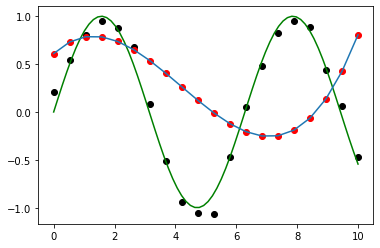

In [ ]:
a = np.linspace(0,10,num=70)
plt.plot(a,np.sin(a),color='green')
plt.scatter(x,y,color='black')
plt.scatter(x,yhat,color='red')
plt.plot(x,yhat)

Now, we will try out for the 2nd loss function. We need a lot more epochs here

In [ ]:
t=time.time()
w_vector = np.random.randn(4)
print(w_vector)
time.time()-t

[ 0.24719316  1.68196451 -0.87514259  0.36664321]


0.00043964385986328125

In [ ]:
t=time.time()
print(lossmod(y,x,w_vector))
yhat = []
lossf = []
#finding gradient wrt w[0]
for i in range(50000):
  #g4,yhat = grad2(loss,w_vector,x,y,0.0000000001,4)
  g3,yhat = grad2(lossmod,w_vector,x,y,0.0000000001,3)
  g2,yhat = grad2(lossmod,w_vector,x,y,0.0000000001,2)
  g1,yhat = grad2(lossmod,w_vector,x,y,0.0000000001,1)
  g0,yhat = grad2(lossmod,w_vector,x,y,0.0000000001,0)
  #for j in range(6):
  #  w_vector[j]-=0.1
  
  #w_vector[4]-=1e-8*g4
  #print("w[4] {}".format(w_vector[4]))
  w_vector[3]-=1e-7*g3
  #print("w[3] {}".format(w_vector[3]))
  w_vector[2]-=1e-7*g2
  #print("w[2] {}".format(w_vector[2]))
  w_vector[1]-=1e-7*g1
  #print("w[1] {}".format(w_vector[1]))
  w_vector[0]-=1e-7*g0
  #print("w[0] {}".format(w_vector[0]))
  #print(yhat)
  l,_ = lossmod(y,x,w_vector)
  lossf.append(l)
  if i%1000 == 0:
    print("Loss at epoch {} is {}".format(i,l))

time.time()-t

(1500.7265955131707, [0.24719315910283626, 0.9434701907457096, 1.4756296281972585, 2.164397415675446, 3.330499497398235, 5.294661817583587, 8.377610320449472, 12.900070950213843, 19.182769651094674, 27.54643236730991, 38.31178504307753, 51.7995536226155, 68.3304640501418, 88.22524226987434, 111.8046142260311, 139.38930586283007, 171.30004312448924, 207.85755195522654, 249.38255829925978, 296.19578810080725])
Loss at epoch 0 is 1497.9086588443765
Loss at epoch 1000 is 48.698819446803185
Loss at epoch 2000 is 47.0812810097802
Loss at epoch 3000 is 45.48002521457152
Loss at epoch 4000 is 43.862486881712975
Loss at epoch 5000 is 42.26123101315327
Loss at epoch 6000 is 40.64369264486344
Loss at epoch 7000 is 39.042436757864664
Loss at epoch 8000 is 37.50802377079372
Loss at epoch 9000 is 36.080583919854725
Loss at epoch 10000 is 34.66706458562361
Loss at epoch 11000 is 33.239624714317074
Loss at epoch 12000 is 31.91012529875894
Loss at epoch 13000 is 30.97337652643863
Loss at epoch 14000 is

54.87465143203735

Plotting the function we generated

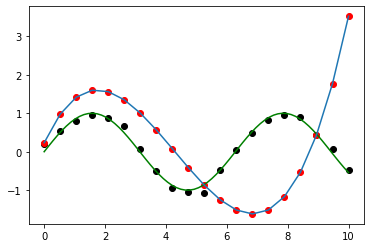

In [ ]:
a = np.linspace(0,10,num=70)
plt.plot(a,np.sin(a),color='green')
plt.scatter(x,y,color='black')
plt.scatter(x,yhat,color='red')
plt.plot(x,yhat)

---
With this, we have come to the end of the notebook! Our fitted curve might look to be very different from sin x, but if we compare datapoint for datapoint in blue and black, we see that actually we have done quite well on the dataset with little data. We did better with the Mean Squared error loss function. This means that the Mean Squared error function optimized the problem better  